Load each .csv folder to combined df

In [2]:
import pandas as pd
import glob 

folder_path = "data"
files = glob.glob(f"{folder_path}/*.csv")

dataframes_dict = {}  

for file in files:
    df = pd.read_csv(file, delimiter=';')
    date = file.split('/')[-1].split(' ')[0]
    time = file.split('/')[-1].split(' ')[1].split('.')[0]
    print(f"Loaded file: {file}")
    dataframes_dict[f"{date} {time}"] = df

combined_df = pd.concat(dataframes_dict.values(), ignore_index=True)

Loaded file: data/2024-11-28 12-48-19.csv
Loaded file: data/2024-12-10 12-18-00.csv
Loaded file: data/2024-11-29 07-42-09.csv
Loaded file: data/2024-12-02 07-29-41.csv
Loaded file: data/2024-11-14 10-26-54.csv
Loaded file: data/2024-12-03 11-20-34.csv
Loaded file: data/2024-12-13 22-27-09.csv
Loaded file: data/2024-12-03 16-45-25.csv
Loaded file: data/2024-11-13 07-35-32.csv
Loaded file: data/2024-12-12 07-31-01.csv
Loaded file: data/2024-11-15 20-23-56.csv
Loaded file: data/2024-11-18 22-51-37.csv
Loaded file: data/2024-12-10 21-50-08.csv
Loaded file: data/2024-11-29 22-59-23.csv
Loaded file: data/2024-11-26 13-15-04.csv
Loaded file: data/2024-12-20 21-54-43.csv
Loaded file: data/2024-12-14 07-53-22.csv
Loaded file: data/2024-12-05 21-54-46.csv
Loaded file: data/2024-12-22 10-18-11.csv
Loaded file: data/2024-11-18 07-30-17.csv
Loaded file: data/2024-12-18 20-28-23.csv
Loaded file: data/2024-11-15 07-01-47.csv
Loaded file: data/2024-11-28 16-48-37.csv
Loaded file: data/2024-11-13 07-28

In [3]:
#data/2024-12-14 07-53-22.csv
df = dataframes_dict['2024-12-14 07-53-22']
# Ensure the necessary columns are present and correctly formatted
df['VALUE'] = pd.to_numeric(df['VALUE'], errors='coerce')
df['SECONDS'] = pd.to_numeric(df['SECONDS'], errors='coerce')
df['PID'] = df['PID'].astype(str)

# Create an array that stores each PID then create a dictionary that stores each PID and its corresponding values with seconds
PID = df['PID'].unique()
PID_dict = {}
for i in PID:
    PID_dict[i] = pd.Series(df[df['PID'] == i]['VALUE'].values, index=df[df['PID'] == i]['SECONDS'])

df.head()

,SECONDS,PID,VALUE,UNITS,LATITUDE,LONGTITUDE,Unnamed: 6
0,28411.683627,Average speed (GPS),0.0,km/h,40.914741,29.193722,NaN
1,28411.683627,Speed (GPS),0.0,km/h,40.914741,29.193722,NaN
2,28411.690627,Altitude (GPS),123.5,m,40.914741,29.193722,NaN
3,28411.697627,Altitude (GPS),123.5,m,40.914741,29.193722,NaN
4,28411.697627,Average speed (GPS),0.0,km/h,40.914741,29.193722,NaN


In [4]:
#lets create a map view of the data using the location data and the folium library

import folium
from folium.plugins import HeatMap

m = folium.Map(location=[df['LATITUDE'].mean(), df['LONGTITUDE'].mean()], zoom_start=12)

heat_data = [[row['LATITUDE'],row['LONGTITUDE']] for index, row in df.iterrows()]

HeatMap(heat_data).add_to(m)

m.save('map.html')





/Users/yagizebil/Developer/DSA210_yagiz/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [5]:
# If the df has a column with Latitude and Longitude, add it to the map and create a combined map with all the data

m = folium.Map(location=[df['LATITUDE'].mean(), df['LONGTITUDE'].mean()], zoom_start=15)

for date_time, df in dataframes_dict.items():
    if 'LATITUDE' in df.columns and 'LONGTITUDE' in df.columns:
        heat_data = [[row['LATITUDE'], row['LONGTITUDE']] for index, row in df.iterrows()]
        HeatMap(heat_data).add_to(m)

m.save('map_all.html')

Initial DataFrame:
         SECONDS                           PID      VALUE UNITS  Unnamed: 4
0  78833.728538  Absolute throttle position B  16.000000     %         NaN
1  78833.882538     Absolute pedal position D  41.000000     %         NaN
2  78834.036538            OBD Module Voltage  14.000000     V         NaN
3  78834.593538  Calculated engine load value  68.627451     %         NaN
4  78834.742538    Engine coolant temperature  46.000000     ℃         NaN


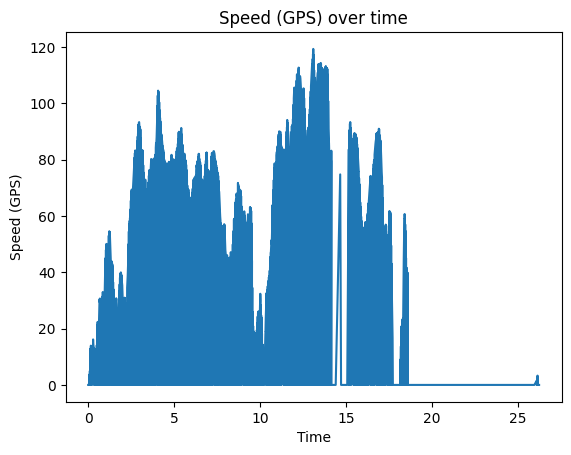

In [6]:
#create a graph for PID = PID
import matplotlib.pyplot as plt

print("Initial DataFrame:\n", df.head())

df['VALUE'] = pd.to_numeric(df['VALUE'], errors='coerce')
df['SECONDS'] = pd.to_numeric(df['SECONDS'], errors='coerce')
df['PID'] = df['PID'].astype(str)
df['VALUE'] = df['VALUE'].astype(float)
df['SECONDS'] = df['SECONDS'].astype(float)

i = 'Speed (GPS)'
df = pd.DataFrame(PID_dict[i])
plt.plot((PID_dict[i].index - PID_dict[i].index[0])/60, PID_dict[i].values, label=i)
plt.xlabel('Time')
plt.ylabel(i)
plt.title(i + ' over time')
plt.show()

0
Average speed (GPS)
1
Speed (GPS)
2
Altitude (GPS)
3
Absolute throttle position B
4
Absolute pedal position D
5
OBD Module Voltage
6
Calculated engine load value
7
Engine coolant temperature
8
Short term fuel % trim - Bank 1
9
Long term fuel % trim - Bank 1
10
Calculated boost
11
Intake manifold absolute pressure
12
Calculated instant fuel rate
13
Engine RPM
14
Engine RPM x1000
15
Instant engine power (based on fuel consumption)
16
Calculated instant fuel consumption
17
Vehicle speed
18
Timing advance
19
Intake air temperature
20
Fuel economizer (based on fuel system status and throttle position)
21
Throttle position
22
Oxygen sensor 1 Bank 1 Short term fuel trim
23
Oxygen sensor 1 Bank 1 Voltage
24
Oxygen sensor 2 Bank 1 Short term fuel trim
25
Oxygen sensor 2 Bank 1 Voltage
26
Distance traveled with MIL on
27
Commanded evaporative purge
28
# warm-ups since codes cleared
29
Distance traveled since codes cleared
30
Catalyst temperature Bank 1 Sensor 1
31
Catalyst temperature Bank 1 S

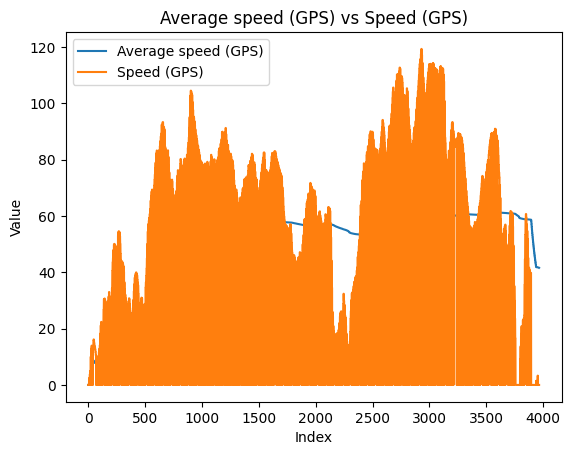

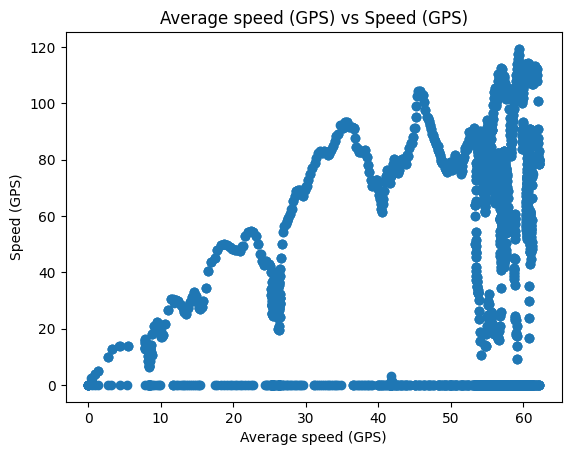

In [7]:
import matplotlib.pyplot as plt
import random

df = dataframes_dict['2024-12-14 07-53-22']

#create int num
num = 0
for pid in PID:
    print(num)
    print(pid)
    num = num + 1

#df contains all values under PID column, so we need to extract the values for the specific PIDs we are interested in
check_one = PID[0]
check_two = PID[1]
one = df[df['PID'] == check_one]
two = df[df['PID'] == check_two]

#reindex the dataframes
one = one.reset_index(drop=True)
two = two.reset_index(drop=True)

#make all values numeric
one['VALUE'] = pd.to_numeric(one['VALUE'], errors='coerce').fillna(0)
two['VALUE'] = pd.to_numeric(two['VALUE'], errors='coerce').fillna(0)

#make the count of the values the same, take average of the values to make the count the same
while len(one) > len(two):
    one = one.drop(one.index[1]).reset_index(drop=True)
while len(two) > len(one):
    random_index = random.randint(0, len(two)-2)
    two = two.drop(two.index[random_index+1]).reset_index(drop=True)

#plot the values single plot
plt.plot(one['VALUE'], label=check_one)
plt.plot(two['VALUE'], label=check_two)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title(f"{check_one} vs {check_two}")
plt.legend()
plt.show()

plt.scatter(one['VALUE'], two['VALUE'])
plt.xlabel(check_one)
plt.ylabel(check_two)
plt.title(f"{check_one} vs {check_two}")

plt.show()

/Users/yagizebil/Developer/DSA210_yagiz/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


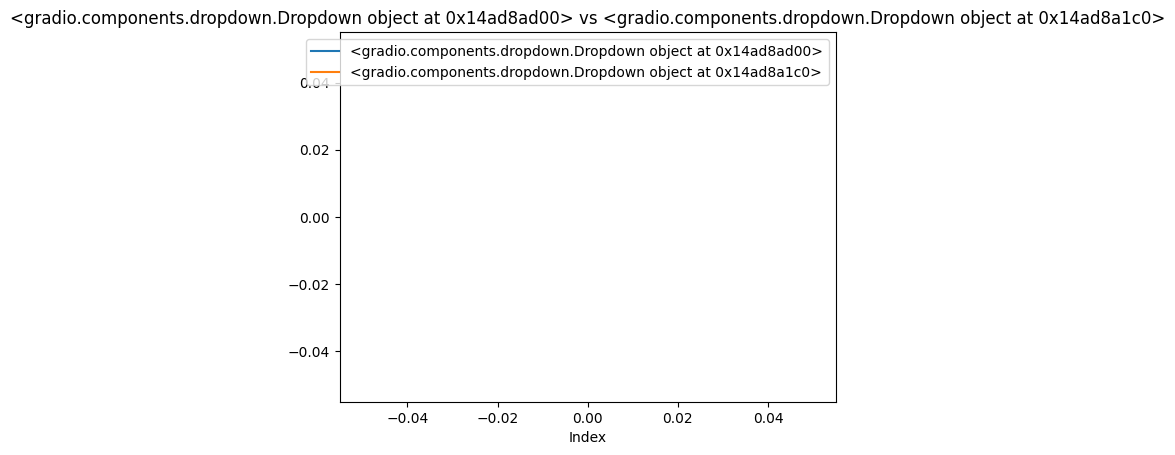

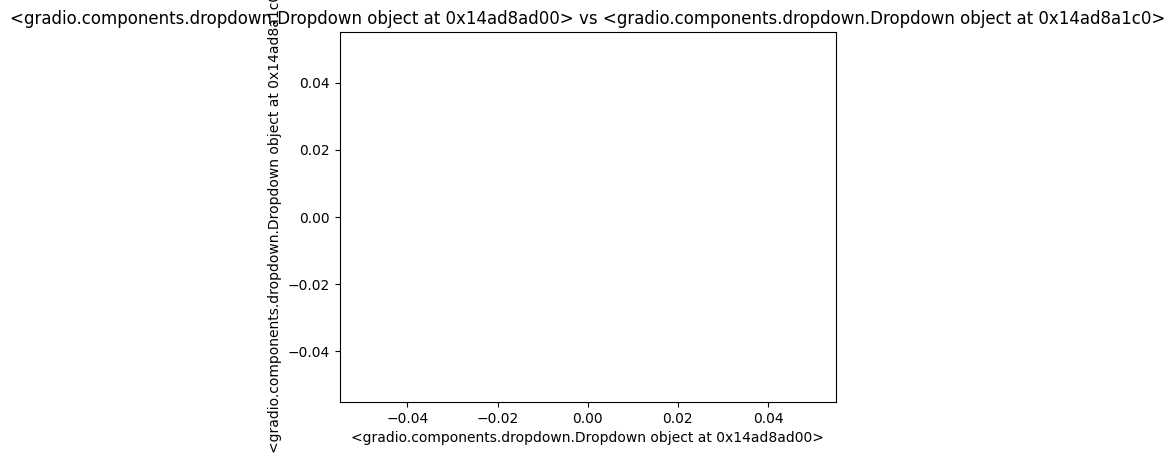

AttributeError: 'Plot' object has no attribute 'launch'

In [8]:
#generate gradio
import gradio as gr

def plot_values(PID1, PID2):
    one = df[df['PID'] == PID1]
    two = df[df['PID'] == PID2]
    one = one.reset_index(drop=True)
    two = two.reset_index(drop=True)
    one['VALUE'] = pd.to_numeric(one['VALUE'], errors='coerce').fillna(0)
    two['VALUE'] = pd.to_numeric(two['VALUE'], errors='coerce').fillna(0)
    while len(one) > len(two):
        one = one.drop(one.index[1]).reset_index(drop=True)
    while len(two) > len(one):
        random_index = random.randint(0, len(two)-2)
        two = two.drop(two.index[random_index+1]).reset_index(drop=True)
    plt.plot(one['VALUE'], label=PID1)
    plt.plot(two['VALUE'], label=PID2)
    plt.xlabel('Index')
    plt.title(f"{PID1} vs {PID2}")
    plt.legend()
    plt.show()
    plt.scatter(one['VALUE'], two['VALUE'])
    plt.xlabel(PID1)
    plt.ylabel(PID2)
    plt.title(f"{PID1} vs {PID2}")
    plt.show()

PID1 = gr.Dropdown(list(PID), label="PID1")
PID2 = gr.Dropdown(list(PID), label="PID2")

gr.Interface(plot_values, [PID1, PID2], "plot").launch()
gr.Plot(plot_values(PID1, PID2)).launch()


In [ ]:
#create a hyptothesis test for the data

import scipy.stats as stats

# Create a function that takes in two PIDs and returns the p-value of a t-test

def t_test(PID1, PID2):
    one = df[df['PID'] == PID1]
    two = df[df['PID'] == PID2]
    one = one.reset_index(drop=True)
    two = two.reset_index(drop=True)
    one['VALUE'] = pd.to_numeric(one['VALUE'], errors='coerce').fillna(0)
    two['VALUE'] = pd.to_numeric(two['VALUE'], errors='coerce').fillna(0)
    while len(one) > len(two):
        one = one.drop(one.index[1]).reset_index(drop=True)
    while len(two) > len(one):
        random_index = random.randint(0, len(two)-2)
        two = two.drop(two.index[random_index+1]).reset_index(drop=True)
    t_stat, p_value = stats.ttest_ind(one['VALUE'], two['VALUE'])
    return p_value

PID1 = gr.Dropdown(list(PID), label="PID1")
PID2 = gr.Dropdown(list(PID), label="PID2")

gr.Interface(t_test, [PID1, PID2], "number").launch()
gr.Interface(t_test, [PID1, PID2], "number").launch()

In [1]:
#create correlation matrix"

correlation_matrix = df.corr()
print(correlation_matrix)

#plot the correlation matrix
import seaborn as sns

sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()


NameError: name 'df' is not defined